In [3]:
from api_key import *
import numpy as np
import pandas as pd
import json
import os
import time
import networkx as nx
import scipy.stats as stats
import matplotlib.pyplot as plt #plotting
%matplotlib inline

In [4]:
from pyechonest import config
config.ECHO_NEST_API_KEY = api_key_1
#config.ECHO_NEST_API_KEY = api_key_2
#config.ECHO_NEST_API_KEY = api_key_3

In [5]:
from pyechonest import artist 

### Get the Top 1000 hottest singer

In [6]:
from pyechonest import artist 
hot1000_artist = artist.top_hottt(0, 1000)
singer_list = [i.name for i in hot1000_artist]

In [ ]:
data = pd.DataFrame({'artist':singer_list})
data.to_csv('top1000.csv',encoding="utf-8",index=False)

In [9]:
singer_pd = pd.read_csv('top1000.csv', encoding="utf-8")

In [7]:
ln = len(singer_list)
singer_edge = pd.DataFrame(np.zeros(ln**2).reshape(ln,ln))

In [ ]:
star = '*'*10
for i in range(ln):
    sim_list = [singer.name for singer in artist.Artist(singer_pd.iloc[i]['artist']).similar[:30]]
    for j in range(ln):
        if (i!=j)and(singer_pd.iloc[j]['artist'] in sim_list):
            singer_edge.iloc[i][j] = 1
    if ((i+1)%40==0):
        time.sleep(60)
    print('{0} {1}|{2} {3}'.encode("iso-8859-9").format(star, i+1, artist.Artist(singer_pd.iloc[i]['artist']), star))

In [8]:
singer_edge.to_csv("total_artist_edge.csv",encoding="utf-8",index=True)

In [11]:
singer_edge = pd.read_csv("total_artist_edge.csv",encoding="utf-8",index_col='index')
singer_edge.head()

0  1  2  3  4  5  6  7  8  9 ...   990  991  992  993  994  995  996  \
index                               ...                                       
0      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
3      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   
4      0  0  0  0  0  0  0  0  0  0 ...     0    0    0    0    0    0    0   

       997  998  999  
index                 
0        0    0    0  
1        0    0    0  
2        0    0    0  
3        0    0    0  
4        0    0    0  

[5 rows x 1000 columns]

In [12]:
singer_edge.index=list(singer_list)
singer_edge.columns=list(singer_list)
singer_edge.head()

Adele  Coldplay  Justin Bieber  Calvin Harris  Taylor Swift  \
Adele              0         0              0              0             0   
Coldplay           0         0              0              0             0   
Justin Bieber      0         0              0              0             0   
Calvin Harris      0         0              0              0             0   
Taylor Swift       0         0              0              0             0   

               Ellie Goulding  One Direction  The Weeknd  Drake  Ed Sheeran  \
Adele                       0              0           0      0           0   
Coldplay                    0              0           0      0           0   
Justin Bieber               0              0           0      0           0   
Calvin Harris               0              0           0      0           0   
Taylor Swift                0              0           0      0           0   

                 ...      Jadakiss  Jencarlos Canela  Glass Animals  \
Adele            ...             0                 0              0   
Coldplay         ...             0                 0              0   
Justin Bieber    ...             0                 0              0   
Calvin Harris    ...             0                 0              0   
Taylor Swift     ...             0                 0              0   

               Larry Hernandez  JW  Joey Montana  White Noise  Billie Holiday  \
Adele                        0   0             0            0               0   
Coldplay                     0   0             0            0               0   
Justin Bieber                0   0             0            0               0   
Calvin Harris                0   0             0            0               0   
Taylor Swift                 0   0             0            0               0   

               Stryper  TheFatRat  
Adele                0          0  
Coldplay             0          0  
Justin Bieber        0          0  
Calvin Harris        0          0  
Taylor Swift         0          0  

[5 rows x 1000 columns]

In [13]:
singer_graph = nx.DiGraph()
singer_graph.add_nodes_from(singer_list)

In [14]:
for i in range(ln):
    for j in range(ln):
        if singer_edge.iloc[i][j]==1:
            singer_graph.add_edge(singer_list[i], singer_list[j])

### Visualize the network with artist names as nodes and sizes proportional to artists' hotness

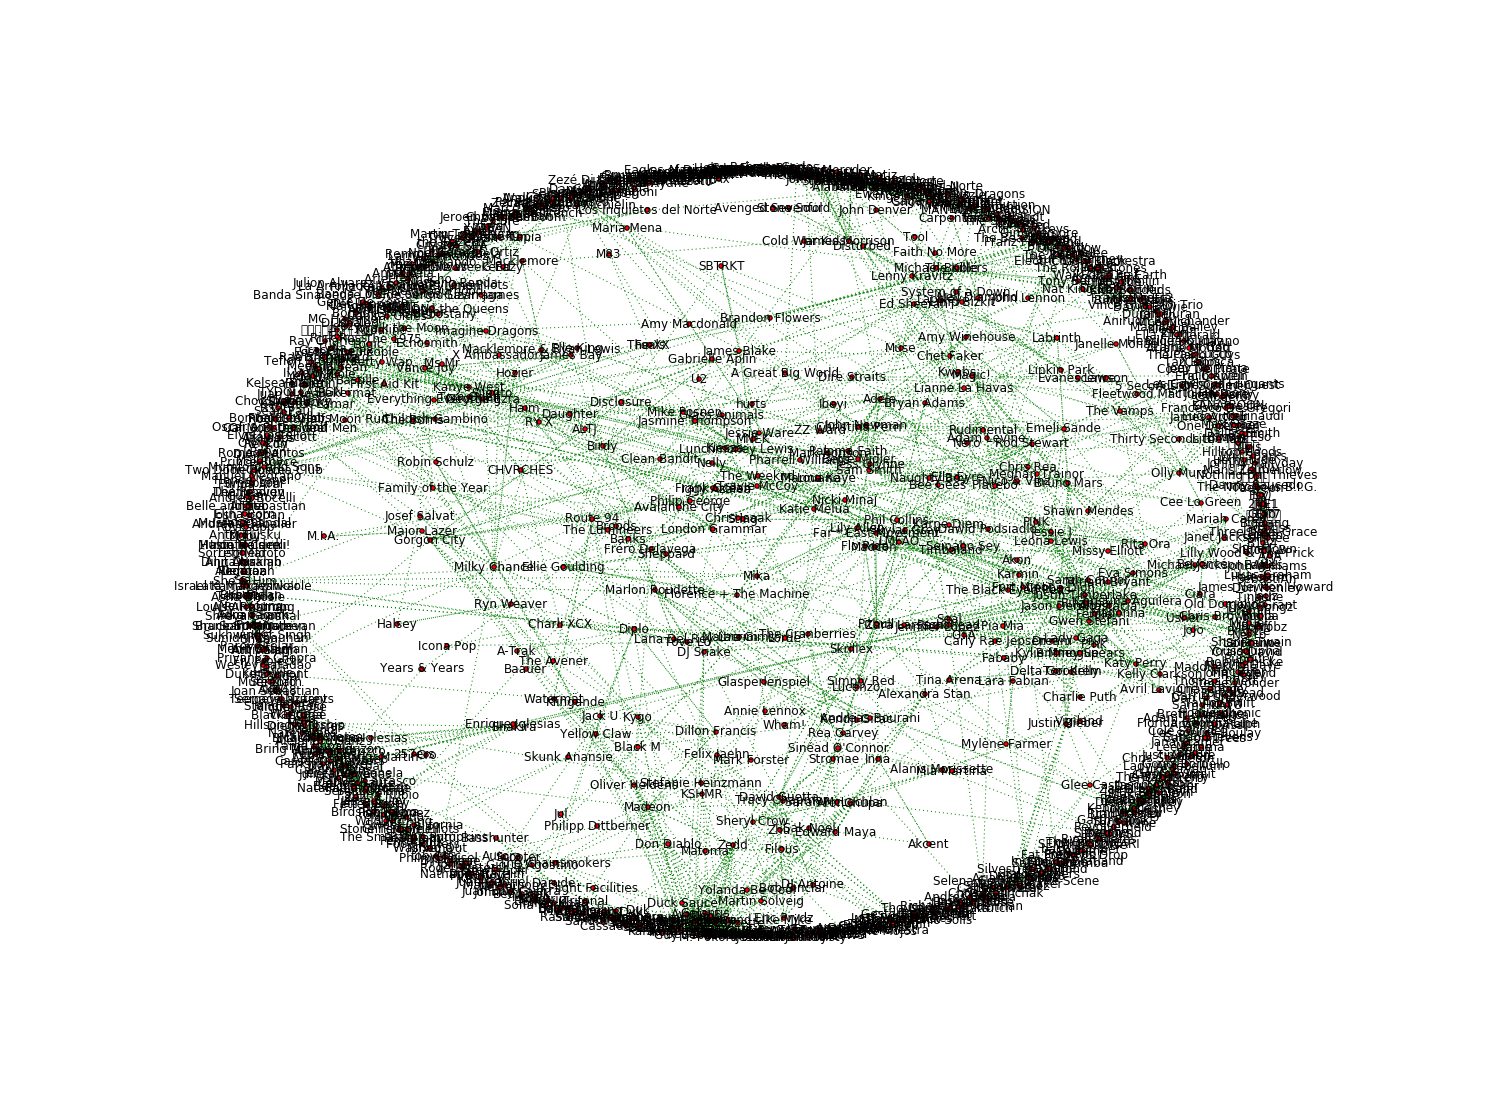

In [15]:
import random
plt.figure(figsize = (20,15))
random.seed(2015)
nx.draw(singer_graph,with_labels=True,arrows=False,node_size=20,style='dotted',edge_color='green')

In [16]:
singer_degree = nx.degree(singer_graph)

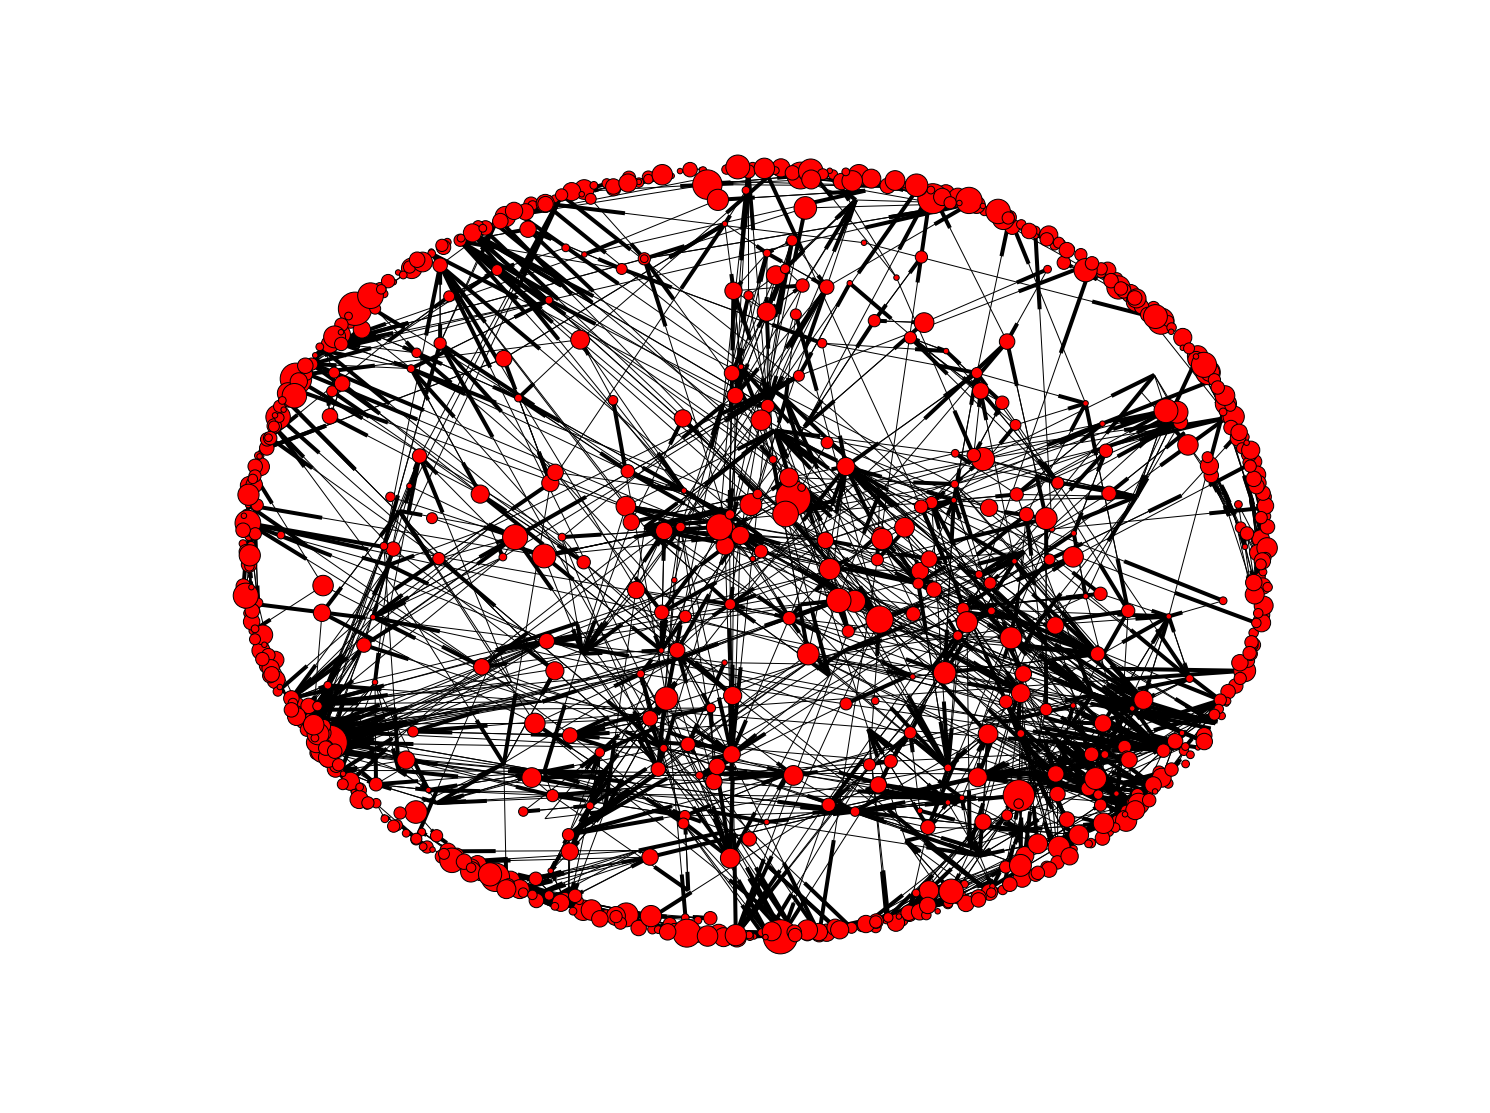

In [17]:
plt.figure(figsize = (20,15))
nx.draw(singer_graph,node_size=30*np.array(singer_degree.values()),with_labels=False,edge_color='black')

### Find artists which are network centers

In [18]:
# output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)  # sort dictionary based on degree values
    for i in range(0,tn):
        print('{0}|{1}:{2}'.decode("iso-8859-9").format(i+1,ind[i],d[ind[i]]))

In [19]:
topdict(singer_degree,10)

1|Swedish House Mafia:41
2|Avicii:40
3|Afrojack:39
4|Hardwell:37
5|Rihanna:33
6|Tiësto:33
7|Alesso:30
8|Kaskade:29
9|Gwen Stefani:27
10|Jennifer Lopez:26


In [20]:
# Eigenvector Centrality
c2= nx.eigenvector_centrality_numpy(singer_graph)
topdict(c2,10)

1|Swedish House Mafia:0.389986251497
2|Avicii:0.378768807535
3|Sebastian Ingrosso:0.363326291606
4|Afrojack:0.354403262859
5|Kaskade:0.298645485528
6|Hardwell:0.292683243767
7|Tiësto:0.283062220298
8|Alesso:0.233475363102
9|Steve Angello:0.198482986219
10|Laidback Luke:0.181464026221


In [21]:
# Katz Centrality
c2= nx.katz_centrality_numpy(singer_graph)
topdict(c2,10)

1|Swedish House Mafia:0.281530194073
2|Avicii:0.272450208692
3|Afrojack:0.256599178896
4|Sebastian Ingrosso:0.243254864952
5|Hardwell:0.217761808812
6|Kaskade:0.212362429281
7|Tiësto:0.210105332621
8|Alesso:0.175156516948
9|Steve Angello:0.141862072833
10|Laidback Luke:0.125394638759


In [22]:
# Pagerank Centrality
a = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
for i in a:
    c5 = nx.pagerank(singer_graph,i)
    print ('a={0}'.format(i))
    topdict(c5,5)

a=0.95
1|Rick Ross:0.010998220039
2|Swedish House Mafia:0.0107358724006
3|Avicii:0.0102087156187
4|Tiësto:0.0093051508104
5|Afrojack:0.00919949598955
a=0.9
1|Swedish House Mafia:0.0089105486263
2|Avicii:0.0084496511099
3|Rick Ross:0.00834941630105
4|Tiësto:0.007903161846
5|Afrojack:0.00772213910276
a=0.85
1|Swedish House Mafia:0.00767197063998
2|Avicii:0.00726038746082
3|Tiësto:0.00692049955291
4|Rick Ross:0.00685092698401
5|Afrojack:0.00672968802577
a=0.8
1|Swedish House Mafia:0.00672499219311
2|Avicii:0.00635401453586
3|Tiësto:0.00614808593442
4|Afrojack:0.00597264559525
5|Rick Ross:0.00584025327032
a=0.7
1|Swedish House Mafia:0.00531233508027
2|Avicii:0.00500773253626
3|Tiësto:0.00496044411422
4|Rihanna:0.00490755046732
5|Afrojack:0.00483631324398
a=0.6
1|Swedish House Mafia:0.00427272090451
2|Rihanna:0.00412163831795
3|Tiësto:0.00405942919828
4|Avicii:0.00402255413749
5|Afrojack:0.00398331476045
a=0.5
1|Swedish House Mafia:0.00345499402534
2|Rihanna:0.00344455198282
3|Tiësto:0.0033

### Degree Distribution

In [23]:
#introduce auxiliary function visualizing the degree rank plots
def rankPlot(x,params=[]):
    #visualize the rankplot for the array x, fitting it with a power law, lognormal or normal distribution (according to fit) 
    #params - power-law fit cut-off
    xs=sorted(x,reverse=True) # sort the sequence in decreasing order
    plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
    plt.title("Centrality rank plot") #plot title
    #axe labels  
    plt.ylabel("Centrality")
    plt.xlabel("rank")
    fp=[]                  
    #lognormal fit
    xl=np.log(x[x>0])
    sigma=np.std(xl)
    mu=np.mean(xl)  
    fp=sigma
    s=np.exp(mu)*stats.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
    plt.loglog(s,'r-',marker='.')  
    plt.show()
    return fp 

In [24]:
#introduce a function visualizing degree partial and cumulative distributions
def distribution(x,cdf,params=10):
    xh, xb=np.histogram(np.log(x),bins=params)
    xh=1.0*xh/len(x)
    xb=(xb[1:]+xb[0:-1])/2
    xb=xb[xh>0]
    xh=xh[xh>0]
    if cdf:
        xh=1-np.cumsum(xh[:-1])
        xb=xb[:-1]
        plt.ylabel("P(c>=x)")
    else:
        plt.ylabel("p(c=x)")
    plt.loglog(np.exp(xb),xh,'-b',marker='o')
    plt.xlabel("Centrality, x")

In [25]:
UG = singer_graph
for i in UG.nodes():
    if singer_degree[i]==0:
        UG.remove_node(i)

In [26]:
#and visualize degree distributions for it
d=np.array(nx.degree(UG).values())

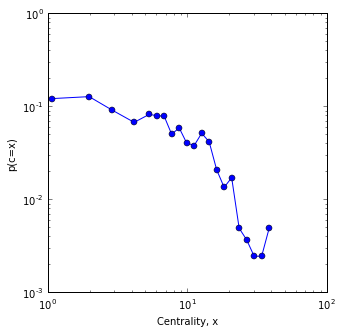

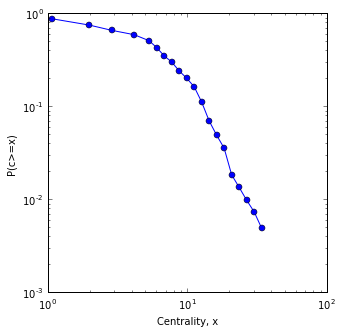

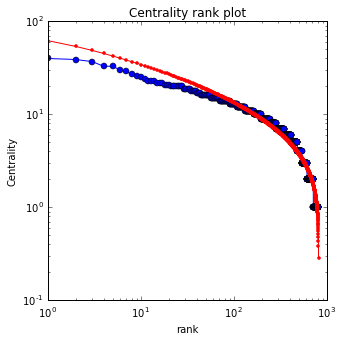

0.87724514095733652

In [27]:
plt.figure(figsize = (5,5))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (5,5))
distribution(d,cdf=1,params=30)
plt.figure(figsize = (5,5))
rankPlot(d,[1])

### Recommendation

* given a artist, find its most similar artists (only one edge away)

In [28]:
# take 'Maroon 5' as an example
selected_artist = ('Maroon 5').encode('utf-8') 
shortest_path = nx.single_source_shortest_path(singer_graph,selected_artist)

In [29]:
similar_artists_list = []
for key, value in shortest_path.iteritems():
    if len(value)==2:
        similar_artists_list.append(key)

In [30]:
print 'Similar artists to {0} are:'.format(selected_artist)
for i in range(0,len(similar_artists_list)):
    a = similar_artists_list[i].encode('utf-8')  # handle wrongly encoded charater
    print ('{0}|{1}').format(i+1,a)

Similar artists to Maroon 5 are:
1|Jason Mraz
2|James Blunt
3|OneRepublic
4|The Script
5|Train
6|Rob Thomas


* Given three random artists, find its most similar artists.

In [31]:
new_list = UG.nodes()

In [32]:
import random

In [33]:
n = 5
rn = random.sample(range(len(new_list)), n)
rn_singer = [new_list[i]  for i in rn]
print('Based on Singers below:\n')
for i in rn_singer:
    print('{0}'.decode("iso-8859-9").format(i))
print
shortest_dist= dict()
for i in new_list:
    shortest_dist[i]=0

for i in range(n):
    shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
    for j in shortest_path.iterkeys():
        ln = len(shortest_path[j])
        if ln>1:
            shortest_dist[j]+=ln

for i in new_list:
    if shortest_dist[i]==0:
        shortest_dist[i]=1000*n
for i in rn_singer:
    shortest_dist[i]=1000*n
import operator
sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
print('The Recommended Singers are:\n')
for i in sorted_shortest_dist[:10]:
    print('{0}'.decode("iso-8859-9").format(i[0]))

Based on Singers below:

Selena Gomez & The Scene
Everything Everything
Janelle Monáe
Twenty One Pilots
LIGABUE

The Recommended Singers are:

Erykah Badu
The Neighbourhood
Jovanotti
Walk the Moon
fun.
Gianna Nannini
Foals
Luca Carboni
Cee Lo Green
Negramaro


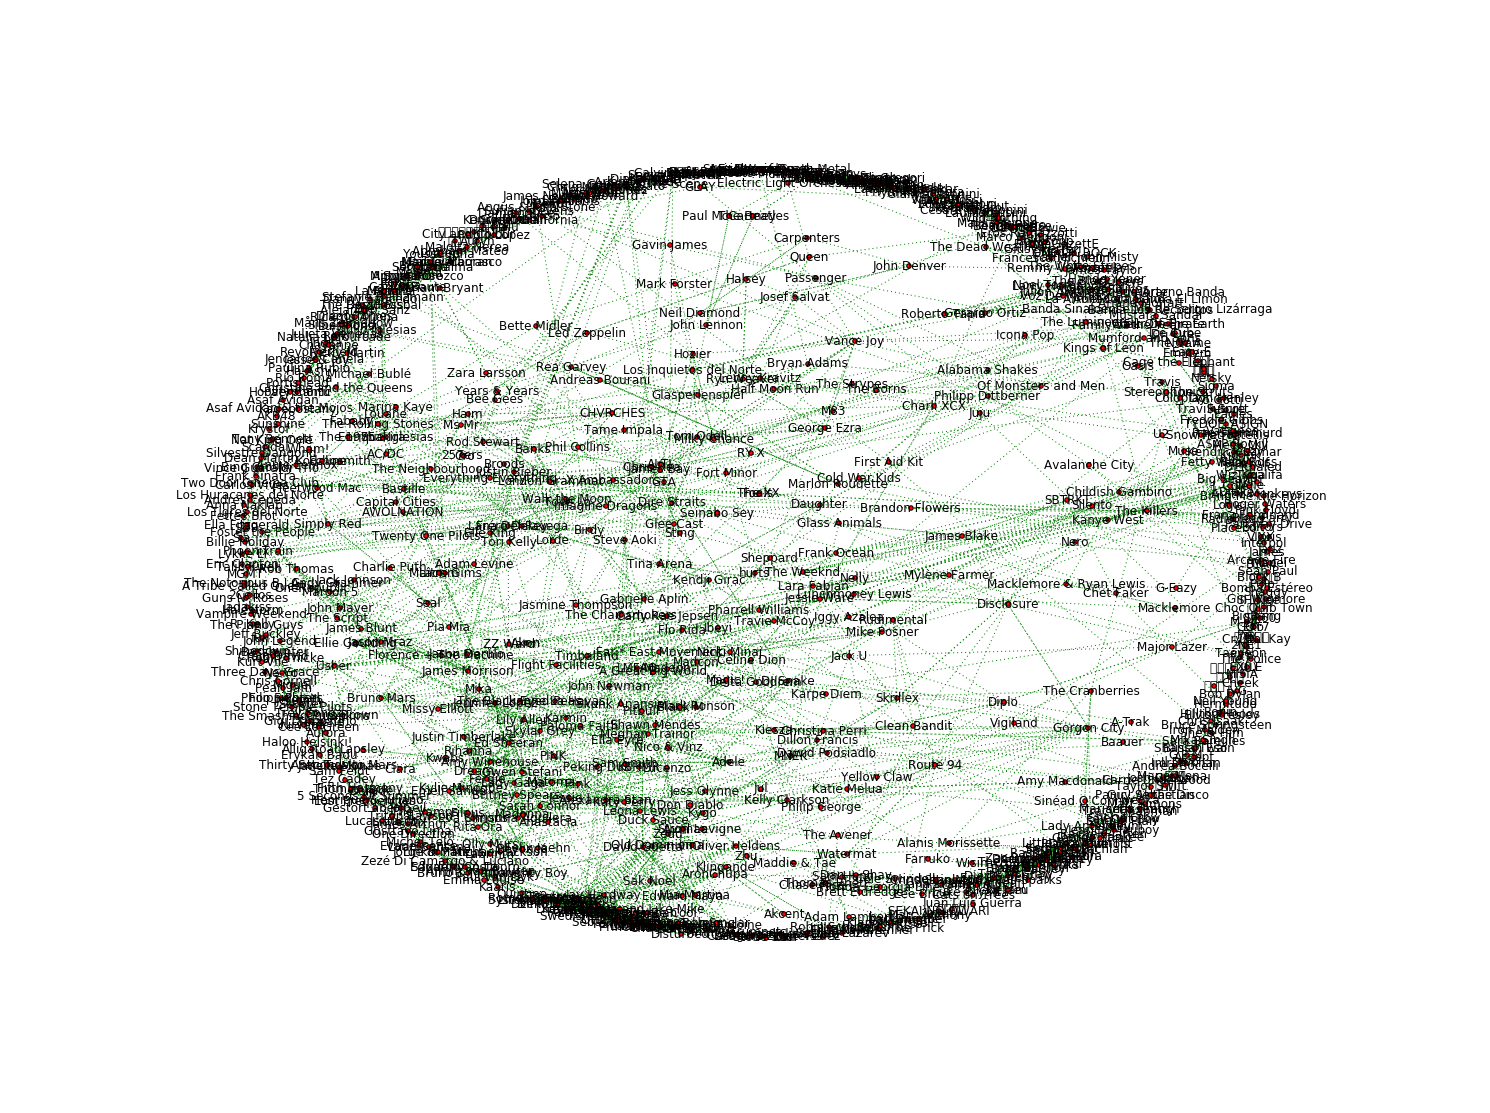

In [34]:
plt.figure(figsize = (20,15))
random.seed(2015)
nx.draw(UG,with_labels=True,arrows=False,node_size=20,style='dotted',edge_color='green')

In [128]:
rn = random.randint(0,len(new_list))
rn_singer = new_list[rn]
print rn,new_list[rn]
while not(singer_degree[new_list[rn]]) in range(20,42):
    rn = random.randint(0,len(new_list))
    rn_singer = new_list[rn]
    print rn,rn_singer

593 SDP
522 Katie Melua
799 Lykke Li
106 Twenty One Pilots
522 Katie Melua
72 LIGABUE
533 ALTJ
342 Mohit Chauhan
757 Stone Sour
584 Lara Fabian
486 Wiz Khalifa
609 Wisin
25 Asha Bhosle
522 Katie Melua
94 James Taylor
240 Delta Goodrem
490 A Tribe Called Quest
735 소녀시대
517 Major Lazer
438 Daddy Yankee
373 Nero
318 Gestört aber Geil
323 Alabama Shakes
520 Maître Gims
721 Lee Brice
195 Far * East Movement
99 Black M
554 Carpenters
540 방탄소년단
350 Adele


(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

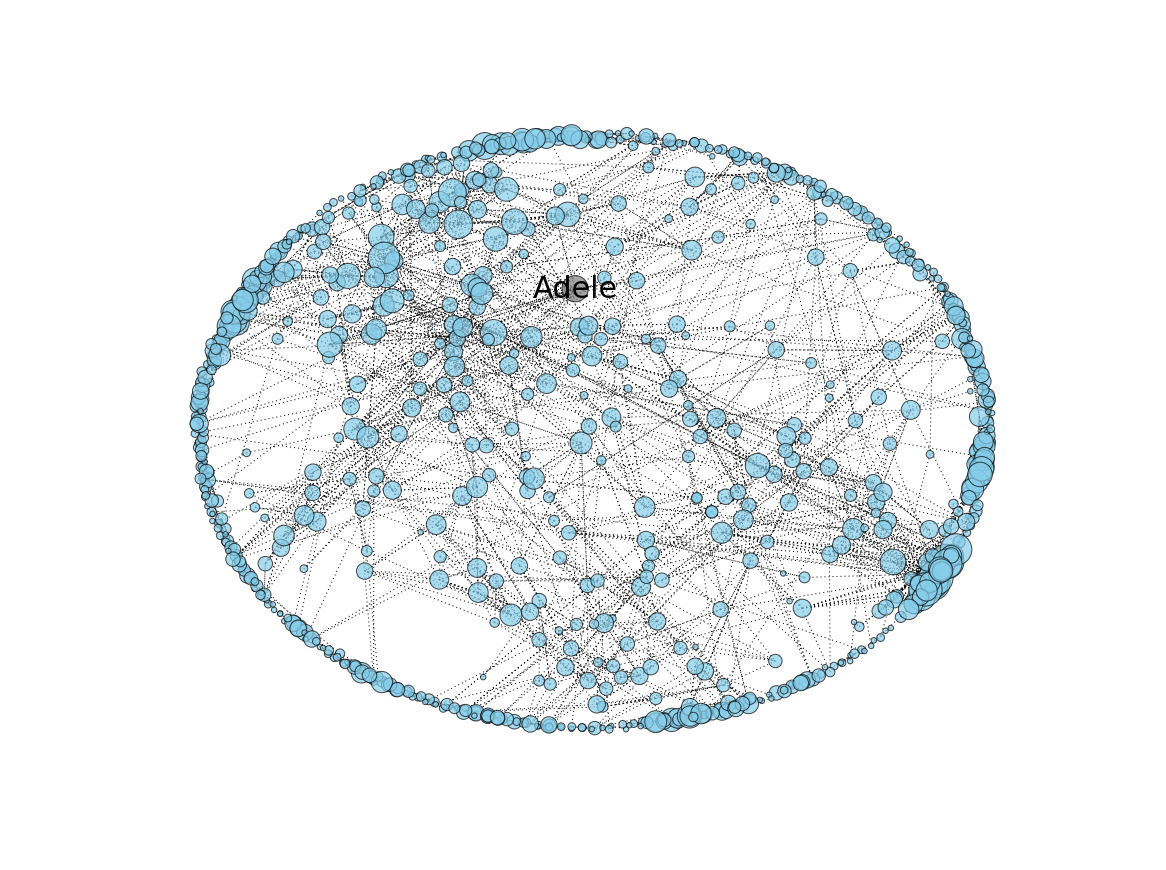

In [129]:
random.seed(2015)
plt.figure(figsize = (20,15))
pos = nx.spring_layout(UG)


color = []
s = []
for i in UG.nodes():
    if i!=rn_singer:
        color.append('Skyblue')
    else:
        color.append('Grey')
for i in UG.nodes():
    s.append(30*singer_degree[i])
nodes = nx.draw_networkx_nodes(UG,pos=pos,with_labels=False,node_size=s,node_color=color,alpha=0.7)
edges = nx.draw_networkx_edges(UG,pos=pos,width=1,edge_color='black',arrows=False,style='dotted')
labels = dict((i, '') for i in new_list)
labels[rn_singer]=rn_singer
nx.draw_networkx_labels(UG,pos,labels,font_size=30,colors='Grey')
plt.axis('off')

In [36]:
#random artist
rn = random.randint(0,len(new_list))
rn_singer = new_list[rn]
labels = dict((i, '') for i in new_list)
labels[rn_singer]=rn_singer

In [38]:
pos[rn_singer]

array([ 0.17190121,  0.34184867], dtype=float32)

In [41]:
UG.nodes()[rn]

u'Katie Melua'

In [61]:
singer_degree[i]

6

In [74]:
rn = random.randint(0,len(new_list))
rn

522

In [102]:
for i in new_list:
    if singer_degree[new_list[0]] in range(1,5)
    

SyntaxError: invalid syntax (<ipython-input-102-fc1b193c1e36>, line 2)

In [100]:
singer_degree[new_list[0]] in range(5,10)

True

In [103]:
rn = 
while i<5:
    i+=1
    print i

1
2
3
4
5
